<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Jose Marcelo Morales Guamantaqui
</h3>
    
<h3 style="text-align:center">
    Fecha: 2025-03-07
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido completar todos los ejercicios propuestos tanto los que requerían técnicas básicas de Python como los que involucraban la librería pandas. Y lo más importante poner en práctica los conocimientos obtenidos durante el curso

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 9 sobre 10.
</font>

<br>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es un archivo de texto (`ds_salaries.csv`) que puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [141]:
# Librerías:
import csv
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup



In [142]:
# Constantes globales:
MOVIES_DATA='./data_in/movie_data.csv'
FEW_FIELDS = './data_in/algunos_campos.txt'


# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [143]:
def load_full_data(csv_filename) -> tuple[list[str], list[list[str]]]:
    """
    Reads a CSV file and returns the header and data rows.

    Args:
        csv_filename (str): The path to the CSV file.

    Returns:
        tuple: A tuple containing the header (list) and data rows (list of lists).
        Returns None, None if a file error occurs.
    """
    try:
        
        with open(MOVIES_DATA, newline='') as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=',')
            full_list_data=[]
            for index, row in enumerate(csv_reader):
                if index == 0:
                    full_header = row 
                else:
                    full_list_data.append(row)
        
        return full_header, full_list_data
    
    except FileNotFoundError:
        print(f"Error: File not found at {csv_filename}")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

                    

In [144]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Salida esperada:

    ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

    [['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|Fantasy', 'Johnny Depp', "Pirates of the Caribbean: At World's End\xa0", '471220', '48350', 'Jack Davenport', '0', 'goddess|marriage ceremony|marriage proposal|pirate|singapore', 'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1', '1238', 'English', 'USA', 'PG-13', '300000000', '2007', '5000', '7.1', '2.35', '0'], ['Color', 'Sam Mendes', '602', '148', '0', '161', 'Rory Kinnear', '11000', '200074175', 'Action|Adventure|Thriller', 'Christoph Waltz', 'Spectre\xa0', '275868', '11700', 'Stephanie Sigman', '1', 'bomb|espionage|sequel|spy|terrorist', 'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1', '994', 'English', 'UK', 'PG-13', '245000000', '2015', '393', '6.8', '2.35', '85000'], ['Color', 'Christopher Nolan', '813', '164', '22000', '23000', 'Christian Bale', '27000', '448130642', 'Action|Thriller', 'Tom Hardy', 'The Dark Knight Rises\xa0', '1144337', '106759', 'Joseph Gordon-Levitt', '0', 'deception|imprisonment|lawlessness|police officer|terrorist plot', 'http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1', '2701', 'English', 'USA', 'PG-13', '250000000', '2012', '23000', '8.5', '2.35', '164000'], ['', 'Doug Walker', '', '', '131', '', 'Rob Walker', '131', '', 'Documentary', 'Doug Walker', 'Star Wars: Episode VII - The Force Awakens\xa0            ', '8', '143', '', '0', '', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1', '', '', '', '', '', '', '12', '7.1', '', '0']]

    

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [145]:
def list_headers(full_header: list) -> list[tuple[int, str]]:
    """
    Enumerates a list of headers and returns a list of tuples.

    Args:
        full_header: A list of header strings.

    Returns:
        A list of tuples, where each tuple contains the index and header.
    """
    output_list=[]
    for num, header in enumerate(full_header):
        output_list.append((num, header))
    return output_list
        


In [146]:
# Test de funcionamiento
list_of_enumerated_headers = list_headers(full_header)
print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


Salida Esperada:

    [(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]

### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [147]:
# Esta celda debe ser completada por el estudiante
def main_data_from_item(full_list: list) -> list[str]:
    """
    Extracts specific data from a list based on predefined column positions.

    Args:
        full_list: A list containing movie data, where each element corresponds to a column.

    Returns:
        A list containing the extracted data in the order defined by column_positions.
        The extracted data corresponds to:
        [movie_title, title_year, director_name, actor_1_name, language,
        country, color, budget, imdb_score, movie_imdb_link].
    """
    
    column_positions = {
    'movie_title':11, 
    'title_year': 23,
    'director_name':1,
    'actor_1_name': 10,
    'language': 19,
    'country': 20,
    'color': 0,
    'budget': 22,
    'imdb_score': 25, 
    'movie_imdb_link': 17
    }
    
    return [full_list[v] for v in column_positions.values()]

        

In [148]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


Salida esperada

    ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

    ['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

    ['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']

### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [149]:
# Esta celda debe ser completada por el estudiante
def datatypes_arranged(raw_data: list) -> list[str]:
    """
    Limpia y transforma los datos de una película.

    Args:
        datos_pelicula: Una lista con los datos de la película.

    Returns:
        Una lista con los datos transformados.
    """
    cleaned_data = [word.strip() for word in raw_data]
    #type transformation
    try:
        cleaned_data[1]=int(cleaned_data[1])
    except ValueError:
        cleaned_data[1]=-1
    try:
        cleaned_data[7]=int(cleaned_data[7])
    except ValueError:
        cleaned_data[7]=-1
    try:
        cleaned_data[8]=float(cleaned_data[8])
    except ValueError:
        cleaned_data[8]=-1
        
     # Clean movie URL
    cleaned_data[9] = cleaned_data[9].split('?ref_')[0] 
        
    return cleaned_data
    
    
        


In [150]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Salida Esperada:

    ['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
    ['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El cojunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños), junto con el año de producción (un entero), que contengan la subcadena "Vict".
</itemize>

In [151]:
# Esta celda debe ser completada por el estudiante
def get_colores(full_data: list) -> set:
    """
    Retrieves distinct color values from a list of lists.

    Each inner list is assumed to have a color value at index 0.

    Args:
        full_data: A list of lists, where each inner list contains color information.

    Returns:
        A set containing the distinct color values.
    """
    return {line[0] for line in full_data}
    
def get_filter_movies(full_data: list, filter_string: str) -> list[tuple[str, int]]:
    """
    Filters a list of movie data to return movies whose titles contain a given substring.

    Args:
        full_data: A list of lists, where each inner list contains movie information.
                   It's assumed that the movie title is at index 11 and the
                   title year is at index 23.
        filter_string: The substring to filter movies by.

    Returns:
        A list of tuples, where each tuple contains the cleaned movie title
        and the title year (as an integer), for movies that match the filter.
    """
    output_list = []
    for movie in full_data:
        if filter_string in movie[11]:
            output_list.append((movie[11].strip(), int(movie[23])))
    return output_list

In [152]:
# Test de funcionamiento

colores = get_colores(full_list_data)
pelis_victor = get_filter_movies(full_list_data, 'Vict')

print(colores)
print(pelis_victor)

{'', ' Black and White', 'Color'}
[('Victor Frankenstein', 2015), ('Victor Frankenstein', 2015), ('The Young Victoria', 2009), ('Victor Frankenstein', 2015), ('Raising Victor Vargas', 2002)]


Salida esperada:

    {'', ' Black and White', 'Color'}
    [('Victor Frankenstein', 2015), ('Victor Frankenstein', 2015), ('The Young Victoria', 2009), ('Victor Frankenstein', 2015), ('Raising Victor Vargas', 2002)]

# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [153]:
def load_main_data(csv_file_path) ->  tuple[list[str], dict[tuple[str, int], list[str | int | float]]]:
    """
    Reads a CSV file, extracts specified columns, and stores the data in a dictionary.

    Args:
        csv_file_path (str): Path to the input CSV file.

    Returns:
        tuple: A tuple containing a list of headers and a dictionary where keys are
               (movie_title, title_year) tuples and values are lists of other columns.
    """

    column_indices = {
        'movie_title': 11,
        'title_year': 23,
        'director_name': 1,
        'actor_1_name': 10,
        'language': 19,
        'country': 20,
        'color': 0,
        'budget': 22,
        'imdb_score': 25,
        'movie_imdb_link': 17,
    }
    movie_data = {}
    with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        next(csv_reader)  # Skip header row
        header_list = list(column_indices.keys())

        for row in csv_reader:
            title = row[column_indices['movie_title']].strip()
            try:
                year = row[column_indices['title_year']].strip()
                year_int = int(year)
            except ValueError:
                year_int = -1

            director = row[column_indices['director_name']].strip()
            actor = row[column_indices['actor_1_name']].strip()
            language = row[column_indices['language']].strip()
            country = row[column_indices['country']].strip()
            color = row[column_indices['color']].strip()

            try:
                budget = row[column_indices['budget']].strip()
                budget_int = int(budget)
            except ValueError:
                budget_int = -1

            try:
                score = row[column_indices['imdb_score']].strip()
                score_float = float(score)
            except ValueError:
                score_float = -1

            link = row[column_indices['movie_imdb_link']].strip()
            link_short = link.split('?ref_')[0]

            key = (title, year_int)  # Use year_int, not year
            value = [director, actor, language, country, color, budget_int, score_float, link_short]
            movie_data[key] = value

    return header_list, movie_data

In [154]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Salida Esperada:

    ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

    ('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
    ("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
    ('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
    ('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
    ('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [155]:
# Esta celda debe ser completada por el estudiante

del full_list_data

In [156]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [157]:
# Esta celda debe ser completada por el estudiante
def movies_anno_for_director(dict_data: dict, director_name: str) -> None:
    """
    Prints the keys (movie title, year) for movies directed by the given director.

    Args:
        dict_data: A dictionary where keys are (movie_title, year) tuples,
                   and values are lists containing movie attributes, including director name.
        director_name: The name of the director to search for.
    """
    output = [key for key, value in dict_data.items() if director_name in value]
    print(output)
   

In [158]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009), ('Titanic', 1997), ('Terminator 2: Judgment Day', 1991), ('True Lies', 1994), ('The Abyss', 1989), ('Aliens', 1986), ('The Terminator', 1984)]


Salida esperada:

    [('Avatar', 2009),
     ('Titanic', 1997),
     ('Terminator 2: Judgment Day', 1991),
     ('True Lies', 1994),
     ('The Abyss', 1989),
     ('Aliens', 1986),
     ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [159]:


def directors_max_movies(dict_data: dict) -> tuple[list[str], int]:
    """
    Finds the director with the most movies in a dictionary and returns their name(s) and movie count.

    Args:
        dict_data (dict): A dictionary where keys are movie identifiers and values are lists,
                          with the first element of each list being the director's name.

    Returns:
        tuple: A tuple containing:
            - A list of the director's name(s) (e.g., ['Steven Spielberg']).
            - The number of movies directed by the top director(s).
            Returns ([], 0) if the input dictionary is empty or no directors are found.
    """
    director_counts = defaultdict(int)
    for movie_info in dict_data.values():
        try:
            director = movie_info[0]
            if director:
                director_counts[director] += 1
        except IndexError:
            continue

    if not director_counts:
        return ([], 0)

    top_director = max(director_counts, key=director_counts.get)
    top_movies = director_counts[top_director]

    return ([top_director], top_movies)

In [160]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


Salida esperada:

    (['Steven Spielberg'], 26)

- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [161]:
# Esta celda debe ser completada por el estudiante
def years_num_movies(dict_data: dict, year_1: int, year_2: int) -> dict:
    """Counts the number of movies released each year within a specified range.

    Args:
        dict_data (dict): A dictionary where keys are movie information tuples (e.g., (title, year, ...)) and values are movie details.
        year_1 (int): The starting year of the range (inclusive).
        year_2 (int): The ending year of the range (inclusive).

    Returns:
        dict: A dictionary where keys are years and values are the number of movies released in those years, filtered by the specified range.
    """
    movie_count = dict()
    for movie_info in dict_data.keys():
        year = movie_info[1]
        movie_count[year] = movie_count.get(year, 0) + 1
    
    filtered_dict = {key: value for key, value in movie_count.items() if year_1 <= key <= year_2}
    
    return filtered_dict

In [162]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


Salida esperada:

    {2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}    

In [163]:
# Esta celda debe ser completada por el estudiante
num_movies_sorted = [(k, v) for k, v in dict(sorted(num_movies.items())).items()]
    

In [164]:
# Test de funcionamiento
    
print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


Salida esperada:

    [(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]

- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el año, el país y el presupuesto. El separador será en este caso |. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [165]:
# Esta celda debe ser completada por el estudiante

def store_file(dict_data: dict, output_file: str) -> None:
    """Writes data from a dictionary to a file, formatting each entry as a pipe-delimited string.

    The dictionary `dict_data` is expected to have keys that are tuples of at least two elements,
    and values that are lists or tuples of at least six elements. The function extracts specific
    elements from the keys and values to construct a string for each entry, which is then written
    to the specified output file.

    Args:
        dict_data (dict): A dictionary where keys are tuples and values are lists/tuples.
        output_file (str): The path to the output file where the data will be written.

    Returns:
        None: This function writes to a file and does not return a value.
    """
    with open(output_file, 'w') as f:
        for key, value in dict_data.items():
            f.write(f"{key[0]}|{key[1]}|{value[2]}|{value[3]}|{value[5]}\n")
    


In [166]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

#! ls data_in/algunos*
# En windows
#! dir data_in\algunos*.*


print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())


Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



Salida esperada:

    data_in/algunos_campos.txt
    
    Avatar|2009|English|USA|237000000
    
    Pirates of the Caribbean: At World's End|2007|English|USA|300000000
    
    Spectre|2015|English|UK|245000000
    
    The Dark Knight Rises|2012|English|USA|250000000
    
    Star Wars: Episode VII - The Force Awakens|-1|||-1

### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [167]:
# Esta celda debe ser completada por el estudiante
def actor_directors(data_dict: dict) -> defaultdict:
    """
    Cuenta cuántas veces ha trabajado cada actor con cada director.

    Args:
        peliculas (dict): Un diccionario donde las claves son tuplas (título, año) 
                          y los valores son listas con información de la película.

    Returns:
        defaultdict: Un diccionario anidado donde la clave principal es el actor,
                     la clave secundaria es el director, y el valor es el conteo.
    """
    conteo_actores_directores = defaultdict(lambda: defaultdict(int))

    for datos_pelicula in data_dict.values():
        director = datos_pelicula[0]
        actor = datos_pelicula[1]
        conteo_actores_directores[actor][director] += 1

    return conteo_actores_directores

    
    

In [168]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(str(num_collaborations)[:1000])

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000001AF094A3CE0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

**Nota.** La siguiente salida puede cambiar puesto que el orden de los datos en un diccionario no es fijo. Debe ser similar a la esperada

Salida esperada:

    <class 'collections.defaultdict'>
    <class 'str'> <class 'collections.defaultdict'>
    <class 'str'> <class 'int'>
    
    defaultdict(<function actor_directors.<locals>.<lambda> at 0x7f9b6c0c4ea0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class 'int'>, {'Christopher Nolan': 1, 'George Miller': 1, 'McG': 1, 'Stuart Baird': 1, 'Daniel Espinosa': 1, 'Brian Hel


### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [169]:
# Esta celda debe ser completada por el estudiante

def filtrar_colaboraciones(conteo_actores_directores, minimo_colaboraciones) -> dict:
    """
    Filtra las colaboraciones de actores y directores según un mínimo.

    Args:
        conteo_actores_directores (defaultdict): Salida de contar_directores_por_actor.
        minimo_colaboraciones (int): Número mínimo de colaboraciones.

    Returns:
        dict: Diccionario de actores con colaboraciones filtradas.
    """
    resultado_filtrado = {}
    for actor, colaboraciones in conteo_actores_directores.items():
        colaboraciones_filtradas = [(director, conteo) for director, conteo in colaboraciones.items() if conteo >= minimo_colaboraciones]
        if colaboraciones_filtradas:
            resultado_filtrado[actor] = colaboraciones_filtradas

    return resultado_filtrado

def print_collaborations_min(mydict: dict)->None:
    """Imprime en pantalla un string formado por clave y valor de un diccionario.
    
    Args:
        mydict (dict): diccionario con colaboraciones
    """
    for actor, colaboraciones in mydict.items():
        print(f"{actor} -> {colaboraciones}")




In [170]:
# Asumimos: 
# 1. El numero minimo que se quiere filtrar es 5
# 2. Tenemos el resultado de la función anterior "num_collaborations"

resultado = filtrar_colaboraciones(num_collaborations, 5)

print_collaborations_min(resultado)

Johnny Depp -> [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio -> [('Martin Scorsese', 5)]
Robert De Niro -> [('Martin Scorsese', 7)]
Bill Murray -> [('Wes Anderson', 5)]
Clint Eastwood -> [('Clint Eastwood', 10)]
Woody Allen -> [('Woody Allen', 10)]


Salida esperada: 

    Johnny Depp  ->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
    Leonardo DiCaprio  ->  [('Martin Scorsese', 5)]
    Robert De Niro  ->  [('Martin Scorsese', 7)]
    Bill Murray  ->  [('Wes Anderson', 5)]
    Clint Eastwood  ->  [('Clint Eastwood', 10)]
    Woody Allen  ->  [('Woody Allen', 10)]

# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [171]:
def representar_xxx_yyy(lista_pares, tres_rotulos = []) -> None:
    """
    Genera un gráfico de líneas a partir de una lista de pares (x, y).

    Args:
        lista_pares: Lista de tuplas, donde el primer elemento es el valor x
                     (convertido a cadena) y el segundo es el valor y.
        tres_rotulos: Lista opcional de 3 cadenas para título, etiqueta del eje y,
                   y etiqueta del eje x, respectivamente. Si no se proporciona,
                   se usan cadenas vacías.
    """
    
    intervalos_de_edad = [str(intervalo) for (intervalo, tasa) in lista_pares]
    tasas = [tasa for (intervalo, tasa) in lista_pares]

    # Esta parde de la celda debe ser completada por el estudiante
    plt.plot(intervalos_de_edad, tasas)
    if not tres_rotulos:
        tres_rotulos=['','','']

    plt.title(tres_rotulos[0])
    plt.ylabel(tres_rotulos[1])
    plt.xlabel(tres_rotulos[2])
    plt.xticks(rotation=45, ha='right') 
    plt.grid(True)
    plt.show()
    

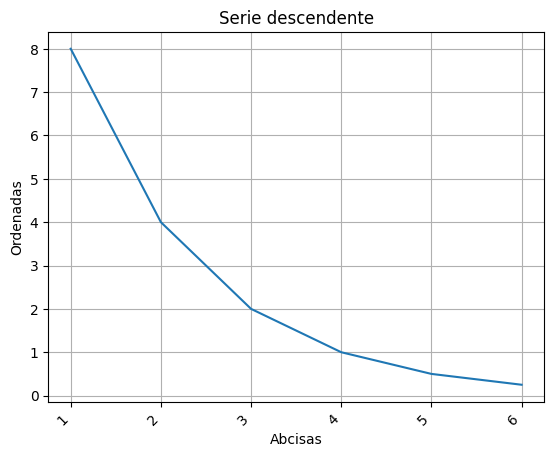

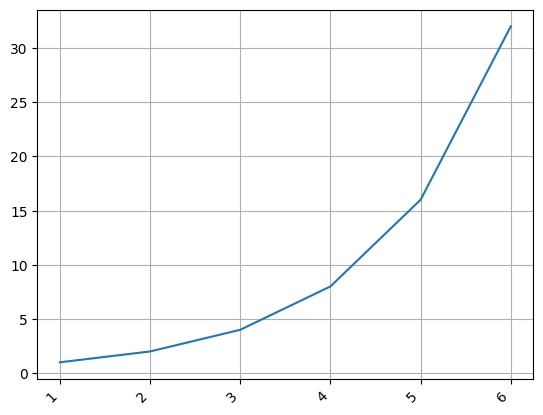

In [172]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

Salida esperada:

<img src='images/graph_01.png' width='800px' alt='Salida esperada del gráfico anterior: curva descentente y curva ascendente' />

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [173]:
# Esta celda debe ser completada por el estudiante
def repr_movies_years(dict_data: dict, year1, year2) -> None:
    year_count = defaultdict(int)
    for k in dict_data.keys():
        if k[1]>= year1 and k[1]<=year2:
            year_count[k[1]]+=1
    year_count_sorted = dict(sorted(year_count.items()))
    years = [k for k in year_count_sorted.keys()]
    counts = [v for v in year_count_sorted.values()]
    
    plt.plot(years, counts)
    plt.title('Number of movies in our database')
    plt.ylabel('num. movies in a year')
    plt.xlabel('years')
    plt.xticks(rotation=45, ha='right') 
    plt.grid(True)
    plt.show()
    

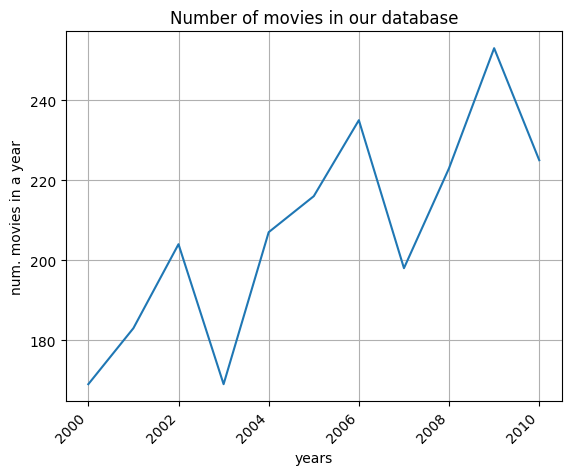

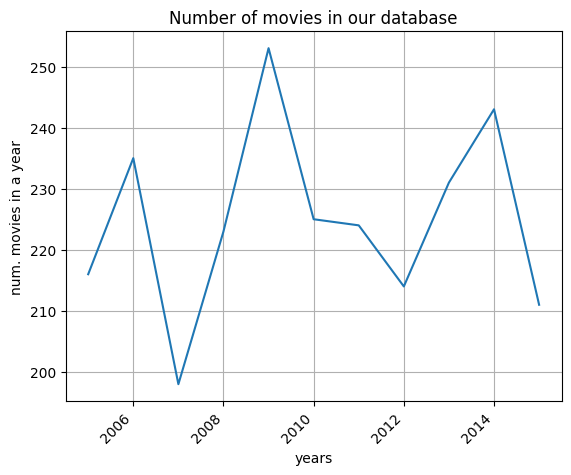

In [174]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

Salida esperada:

<img src='images/graph_02.png' width='800px' alt='' />

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [175]:
# Esta celda debe ser completada por el estudiante

urls = [v[7] for v in main_dict_data.values()]
first_url_movie = urls[0]
first_ten_urls = urls[:10]

In [176]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


Salida esperada:

    4919
    
    http://www.imdb.com/title/tt0499549/
    
    ['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']    

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [177]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

In [178]:
def soup_movie(movie_url: str) -> str:
    """
    Obtiene el código HTML de una URL de película, evitando errores 403.

    Args:
        movie_url (str): La URL de la película.

    Returns:
        str: El código HTML de la página web, o una cadena vacía en caso de error.

    Raises:
        requests.exceptions.RequestException: Si ocurre un error con la solicitud HTTP.
        
    """
    requests.packages.urllib3.disable_warnings()
    try:
        response = requests.get(movie_url, verify=False, headers=HEADERS)
        response.raise_for_status()  
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener la URL {movie_url}: {e}")
        return ""
    except Exception as e:
        print(f"Error inesperado al obtener la URL {movie_url}: {e}")
        return ""

In [179]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)
print(type(soup))

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<class 'str'>
<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1741849135652);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta name="description" content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldaña, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn bet

Salida esperada:

    <!DOCTYPE html>
    <html lang="en-US" translate="no" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
            if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
                var csaLatencyPlugin = window.csa('Content', {
                    element: {
                        slotId: 'LoadTitle',
                        type: 'service-call'
                    }
                });
                csaLatencyPlugin('mark', 'clickToBodyBegin', 1738853581913);
            }
        })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following hi
    
    ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...
    
    g(e+c);return!!e}function n(){for(var e=RegExp("^https://(.*\.(images|ssl-images|media)-amazon\.com|"+c.location.hostname+")/images/","i"),d={},h=0,k=c.performance.getEntriesByType("resource"),l=!1,b,a,m,f=0;f<k.length;f++)if(a=k[f],0<a.transferSize&&a.transferSize>=a.encodedBodySize&&(b=e.exec(String(a.name)))&&3===b.length){a:{b=a.serverTiming||[];for(a=0;a<b.length;a++)if("provider"===b[a].name){b=b[a].description;break a}b=void 0}b&&(l||(l=g(b,"_cdn_fr")),
    a=d[b]=(d[b]||0)+1,a>h&&(m=b,h=a))}g(m,"_cdn_mp")}d.ue&&"function"===typeof d.ue.tag&&c.performance&&c.location&&n()},"cdnTagging")(ue_csm,window);
    
    
    }
    
    /* ◬ */
    </script>
    </div>
    <noscript>
    <img alt="" height="1" src="//fls-na.amazon.com/1/batch/1/OP/A1EVAM02EL8SFB:130-1575513-7998461:SMWGHB497V5D4NRH3FAY$uedata=s:%2Fuedata%2Fuedata%3Fnoscript%26id%3DSMWGHB497V5D4NRH3FAY:0" style="display:none;visibility:hidden;" width="1"/>
    </noscript>
    <script>window.ue && ue.count && ue.count('CSMLibrarySize', 61663)</script></div></body></html>

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de actores
- La información sobre el presupuesto


Nota para el profesor: en este apartado he creado 2 celdas, 1 para definir la function get_movie_details y otra para probar su funcionamiento

In [180]:
# Esta celda debe ser completada por el estudiante
def get_movie_details(soup: str) -> dict:
    """
    Extrae detalles de una película de un contenido HTML de BeautifulSoup.

    Args:
        soup_content: El contenido HTML de la página de la película como una cadena.

    Returns:
        Un diccionario que contiene el título, la descripción, la lista de actores y el presupuesto de la película.
        Devuelve None para los campos que no se encuentran en el HTML.
    """
    soup = BeautifulSoup(soup_movie(first_url_movie), "html.parser")
    # Titulo
    title = soup.title.string
    description = soup.find('meta', attrs={'name': 'description'})['content']
    # Extraer la lista de actores
    actor_links = soup.find_all("a", {"data-testid": "title-cast-item__actor"})
    if actor_links:
        actors = [link.get_text(strip=True) for link in actor_links]
    else:
        pass
    # Presupuesto
    box_office_section = soup.find("section", {"data-testid": "BoxOffice"})
    if box_office_section:
        budget_element = box_office_section.find("li", {"data-testid": "title-boxoffice-budget"})
        if budget_element:
            budget_span = budget_element.find("span", class_="ipc-metadata-list-item__list-content-item")
            budget = budget_span.get_text(strip=True) if budget_span else None
        else:
            budget = None
    else:
        budget = None
    
    return {
        "title": title,
        "description": description,
        "actors": actors,
        "budget": budget,
    }



In [181]:
#Test de funcionamiento 
response = get_movie_details(soup)
title = response['title']
description = response['description']
actors = response['actors']
presupuesto_importe = response['budget']
print(title)
print()
print(description)
print()
print(actors)
print()
print(presupuesto_importe)

Avatar (2009) - IMDb

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldaña, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldaña', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)


Salida esperada:

    <title>Avatar (2009) - IMDb</title>
    
    Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.
    
    ['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']
    
    $237,000,000 (estimated)

### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores de las películas de IMDB, dada la lista de sus URLs.

In [182]:
# Esta celda debe ser completada por el estudiante
def gather_actors(output_name:str, list_urls: list) -> None:
    """
    Gathers actor names from a list of URLs and writes them to a file.

    Args:
        output_name (str): The name of the output file to write the actor names to.
        list_urls (list): A list of URLs to scrape for actor information.

    Returns:
        None: This function writes to a file and does not return a value.
    """
    full_list = list()
    for url in list_urls:
        soup = BeautifulSoup(soup_movie(url), "html.parser")
        # Extraer la lista de actores
        actor_links = soup.find_all("a", {"data-testid": "title-cast-item__actor"})
        if actor_links:
            actors = [link.get_text(strip=True) for link in actor_links]
        else:
            pass
        full_list.extend(actors)
    
    with open(output_name, 'w') as file:
        for actor in full_list:
            file.write(f"{actor}\n")
        

In [183]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

with open("actors_3_first_movies.txt") as f:
    for _ in range(10):
        line = f.readline().strip()
        print(line)

Sam Worthington
Zoe Saldaña
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso


Salida esperada:

    Sam Worthington
    Zoe Saldana
    Sigourney Weaver
    Michelle Rodriguez
    Stephen Lang
    Giovanni Ribisi
    Joel David Moore
    CCH Pounder
    Wes Studi
    Laz Alonso

In [184]:
# La siguente llamada llevaría un tiempo realmente largo:

#import time # para cronometrar esta función, que tarda mucho

#reloj_inicio = time.time()
#gather_actors("actors_all_movies.txt", urls)
#reloj_fin = time.time()

#print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))


# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [185]:
# Esta celda debe ser completada por el estudiante
def load_dataframe(file_path: str) -> pd.DataFrame:
    """Reads CSV file and returns pandas dataframe

    Args:
        file_path (str): absolute path to csv file

    Returns:
        pd.DataFrame: dataframe with data from csv
    """
    df = pd.read_csv(file_path)
    return df

In [186]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Salida esperada:

<img src='images/df_01.png' width='800px' alt='' />

### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [187]:
# Esta celda debe ser completada por el estudiante

def fields_selected_dataframe(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Selects specific fields from a Pandas DataFrame, returning a new DataFrame with only those fields.

    Args:
        data_frame (pd.DataFrame): The input Pandas DataFrame containing movie data.

    Returns:
        pd.DataFrame: A new Pandas DataFrame containing only the selected fields:
                      'movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link'.
    """
    required_fields = ['movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link']
    out_df = data_frame[required_fields]
    return out_df

In [188]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


Salida esperada:

<img src='images/df_02.png' width='800px' alt='' />

### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [189]:
# Esta celda debe ser completada por el estudiante
def my_columns(data_frame: pd.DataFrame) -> None:
    """
    Prints the column names of a Pandas DataFrame.

    Args:
        data_frame (pd.DataFrame): The Pandas DataFrame whose column names will be printed.

    Returns:
        None: This function prints to the console and does not return a value.
    """
    print(data_frame.columns)

my_columns(tabla_breve)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


Salida esperada:

    Index(['movie_title', 'color', 'director_name', 'language', 'country',
           'actor_1_name', 'movie_imdb_link'],
          dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [190]:
# Esta celda debe ser completada por el estudiante
def fill_empty_fields(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Fills all empty (NaN) fields in a Pandas DataFrame with the string 'Desc'.

    Args:
        data_frame (pd.DataFrame): The input Pandas DataFrame containing potentially empty fields.

    Returns:
        pd.DataFrame: A new Pandas DataFrame with all empty fields replaced by 'Desc'.
    """
    output_df = data_frame.fillna('Desc')
    
    return output_df

tabla_breve = fill_empty_fields(tabla_breve)


In [191]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


Salida esperada:

<img src='images/df_03.png' width='800px' alt='' />

### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [192]:
# Esta celda debe ser completada por el estudiante

def titulos_de_director_df(data_frame: pd.DataFrame, directors_name: str) -> pd.DataFrame:
    """Filters a Pandas DataFrame to retrieve the movie titles directed by a specific director.

    Args:
        data_frame (pd.DataFrame): The Pandas DataFrame containing movie data, including a 'director_name' column.
        directors_name (str): The name of the director to filter the DataFrame by.

    Returns:
        pd.DataFrame: A Pandas DataFrame containing only the 'movie_title' column for movies directed by the specified director.
                    Returns an empty DataFrame if no matching director is found.
    """
    
    filtered_df = data_frame[data_frame['director_name'] == directors_name]
    
    return filtered_df[['movie_title']]

In [193]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


Salida esperada:

<img src='images/df_04.png' width='800px' alt='' />

In [194]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Salida esperada:

    ['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']

¿Qué directores han dirigido más de *n* películas?

In [195]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies_df(data_frame: pd.DataFrame, num_peliculas: int) -> list[tuple[list[str], np.int64]]:
    """
    Identifies directors who have directed more than a specified number of movies in a DataFrame.

    Args:
        data_frame (pd.DataFrame): The Pandas DataFrame containing movie data, including a 'director_name' column.
        num_peliculas (int): The minimum number of movies a director must have directed to be included in the result.

    Returns:
        list: A list of tuples, where each tuple contains:
              - A list containing the director's name (str).
              - The number of movies directed by that director (int).
              Directors with the name 'Desc' are excluded from the results, as they likely represent missing director data.
    """
    director_counts = data_frame['director_name'].value_counts()
    #Filtramos el valor por defecto "Desc" al tratarse de director en blanco
    filtered_directors = director_counts[(director_counts > num_peliculas) & (director_counts.index != 'Desc')]
    result = [( [director], np.int64(count)) for director, count in filtered_directors.items()]
    return result
    


In [196]:
# Nota para el profesor: aqui puesto que no se indica explícitamente, he decidido darle a la funcion un parámetro (int) para filtrar el numero de peliculas en este caso para la comprobacion es 25
# En los casos en los que el director es desconocido 'Desc' se está filtrando para no tener en cuenta a este 'director'

directors_max_movies_df(tabla_breve, 25)

[(['Steven Spielberg'], np.int64(26))]

Salida esperada:

    (['Steven Spielberg'], np.int64(26))

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [197]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

["", ""]	-2
["", "USA"]	44130906
["Aboriginal", "Australia"]	6000000
["Aboriginal", "UK"]	80000000
["Arabic", "Egypt"]	1500000
["Arabic", "France"]	1300000
["Arabic", "Germany"]	-1
["Arabic", "Turkey"]	8300000
["Arabic", "United Arab Emirates"]	125000
["Aramaic", "USA"]	30000000
["Bosnian", "USA"]	13000000
["Cantonese", "China"]	25000000
["Cantonese", "Hong Kong"]	129499999
["Cantonese", "USA"]	-1
["Chinese", "China"]	11999998
["Czech", "Czech Republic"]	84450000
["Danish", "Denmark"]	50099998
["Dari", "Afghanistan"]	46000
["Dari", "USA"]	20000000
["Dutch", "Netherlands"]	32150000
["Dzongkha", "Australia"]	1800000
["English", ""]	3499998
["English", "Aruba"]	35000000
["English", "Australia"]	1415805518
["English", "Bahamas"]	5000000
["English", "Belgium"]	48999999
["English", "Brazil"]	3000000
["English", "Bulgaria"]	7000000
["English", "Cambodia"]	-1
["English", "Cameroon"]	-1
["English", "Canada"]	1551511984
["English", "Chile"]	26000000
["English", "China"]	287005000
["English", "Cz

In [198]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [199]:
! type language_budget_countries.py

from mrjob.job import MRJob

class BudgetByLanguageCountry(MRJob):

    def mapper(self, _, line):
        parts = line.strip().split('|')
        if len(parts) == 5:
            title, year, language, country, budget = parts
            try:
                budget = int(budget)
                yield (language, country), budget
            except ValueError:
                pass

    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    BudgetByLanguageCountry.run()


# Parte G. Un apartado libre [0.5 puntos]

<font color="darkblue">
<p> # Análisis de Exito por Géneros

Para desentrañar las tendencias y patrones que definen el éxito cinematográfico a través de los géneros, he diseñado un análisis exhaustivo que utiliza visualizaciones interactivas de Plotly. 

A través de gráficos de barras, diagramas de caja y gráficos de dispersión, exploraremos cómo los géneros influyen en la recaudación bruta, la puntuación de IMDB y la participación del público. 

Este análisis nos permitirá obtener una visión clara y detallada de la dinámica de los géneros en la industria del cine, revelando qué géneros dominan en términos de éxito financiero y crítico, y cómo interactúan los diferentes géneros para crear películas memorables.

Para este análisis utilizaremos el dataframe de pandas "tabla_completa" obtenido en un apartado anterior. Transformaremos estos datos separando por géneros, y obtendremos la media de taquilla (gross), puntuación en imdb (imdb_score), numero de usuarios que ha votado (num_voted_users), y presupuesto (budget) para cada genero. Esta agrupación nos servirá para construir los gráficos que utilizaremos en el análisis.
</p>
</font>

In [200]:
# Este apartado debe ser completado por el estudiante

import plotly.express as px
import plotly.graph_objects as go


def plotly_genre_analysis(df):
    """
    Analyzes movie data by genre and generates interactive visualizations using Plotly.

    This function performs the following analyses and displays the results as Plotly figures:

    1.  **Bar Charts:**
        * Average gross revenue per genre.
        * Average IMDb score per genre.
        * Average number of user votes per genre.
    2.  **Box Plots:**
        * Distribution of IMDb scores per genre.
        * Distribution of gross revenue per genre.
    3.  **Scatter Plot:**
        * Relationship between budget and IMDb score, colored by genre.
    4.  **Interactive Table:**
        * Summary statistics (average gross, IMDb score, user votes, and budget) per genre.

    The function requires a Pandas DataFrame with columns 'genres', 'imdb_score', 'gross', 'num_voted_users', and 'budget'.
    It handles missing values by dropping rows with any missing values in these columns.
    The 'genres' column is expected to contain genre strings separated by '|'.

    Args:
        df (pd.DataFrame): A Pandas DataFrame containing movie data with genre information.

    Returns:
        None: This function displays Plotly figures and does not return a value.
    """

    df = df.dropna(subset=['genres', 'imdb_score', 'gross', 'num_voted_users', 'budget'])
    #separamos los generos de la columna genres
    genres_split = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
    df_genres = df.join(genres_split)
   

    #Obtenemos la media de las siguientes features
    genre_stats = df_genres.groupby('genre').agg({
        'gross': 'mean',
        'imdb_score': 'mean',
        'num_voted_users': 'mean',
        'budget': 'mean'
    }).reset_index()
    
    # 1. Graficos de barra
    fig_gross = px.bar(genre_stats, x='genre', y='gross', title='Recaudacion Media por Genero', hover_data=['gross'])
    fig_gross.show()

    fig_imdb = px.bar(genre_stats, x='genre', y='imdb_score', title='Puntuacion Media IMDB por Genero', hover_data=['imdb_score'])
    fig_imdb.show()

    fig_voted = px.bar(genre_stats, x='genre', y='num_voted_users', title='Media de Votaciones de Usuarios por Genero', hover_data=['num_voted_users'])
    fig_voted.show()

    # 2. Graficos de caja
    fig_box_imdb = px.box(df_genres, x='genre', y='imdb_score', title='Distribucion de Puntaje IMDB por Genero', hover_data=['movie_title'])
    fig_box_imdb.show()

    fig_box_gross = px.box(df_genres, x='genre', y='gross', title='Distribucion de Recaudacion por Genero', hover_data=['movie_title'])
    fig_box_gross.show()

    # 3. Graficos Scatter Plot
    fig_scatter = px.scatter(df_genres, x='budget', y='imdb_score', color='genre', title='Presupuesto vs Puntage IMDB (Coloreado por Genero)', hover_data=['movie_title', 'genre', 'budget', 'imdb_score'])
    fig_scatter.show()

    # 4. Tabla Interactiva
    fig_table = go.Figure(data=[go.Table(
        header=dict(values=list(genre_stats.columns),
                    align='left'),
        cells=dict(values=[genre_stats[col] for col in genre_stats.columns],
                   align='left'))
    ])
    fig_table.show()

In [201]:
# Pruebas de funcionamiento, también tarea del estudiante:

plotly_genre_analysis(tabla_completa)

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Morales Guamantaqui
-   **Nombre:** José Marcelo
-   **Email:** marcmor1987@gmail.com
-   **Fecha:** 2025-03-13

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.5  / 2.5  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto |
|d)  |1.0 / 1.0  |Completamente resuelto |
|e)  |2.0  / 2.0  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.0  / 0.5  |Completamente resuelto |
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
</font>

<br>

<font color="darkblue">
Los ejercicios me han parecido interesantes para reforzar los conceptos aprendidos y reforzar lo que ya sabía de antes. 
En el apartado opcional, no tenía muy claro qué hacer pero me decanté por un análisis con gráficos. 

Tras ejecutar la ultima celda de comprobaciones, se menciona que falta declara las variables: presupuesto_apartado, importe_str. No se especifica en qué apartado se pide
definir dichas variables pero entendiendo que es en el apartado de web scrapping, el presupuesto se ha generado en una sola variable.
</font>

<br>

<font color="black">
    

In [202]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor

import sys

modulenames = set(sys.modules) & set(globals())

if "mrjob" in modulenames:
    print("* En las librerías importadas, la siguiente no es necesaria\n" +
          "      from mrjob.job import MRJob\n" +
          "  porque no va a usarse en el cuaderno, sino en un programa externo. Debe omitirse aquí.\n")

from os.path import exists

if not exists("./images/"):
    print("* He echado de menos la carpeta 'images'.\n")

# ----------------------------------------------------------------------------

if not 'defaultdict' in set(globals()) and not 'collections' in modulenames:
    print("El uso de diccionarios por defecto es muy importante y te recomiendo que te familiarices con ellos.")

# ----------------------------------------------------------------------------

nombres = dir()

# Constantes: .....................

# print("----------------- Constantes")

const_names_asked = ["MOVIES_DATA", "FEW_FIELDS"]
for const_name in const_names_asked:
    if const_name not in nombres:
        print("La constante '" + const_name + "' no se ha definido.\n")

# Funciones: .....................

# print("----------------- Funciones")

name_funcs_asked = ["load_full_data", "main_data_from_item", "datatypes_arranged", "load_main_data",
                    "movies_anno_for_director", "directors_max_movies", "years_num_movies", "store_file",
                    "actor_directors", "print_collaborations_min", "representar_xxx_yyy", "gather_actors",
                    "load_dataframe", "titulos_de_director_df", "directors_max_movies_df"]

name_funcs_defined = [f for f in name_funcs_asked if f in nombres]

name_funcs_not_defined = [f for f in name_funcs_asked if f not in nombres]

def comentario(frase, nombres) -> str:
    if nombres != []:
        print(frase + ": " + ", ".join(nombres) + ".\n")

comentario("Las funciones siguientes no están definidas: ", name_funcs_not_defined)

# Variables: .....................

# print("----------------- Variables")

name_vars_asked = ["full_header", "list_of_enumerated_headers", "datos_avatar_2009", "datos_star_wars_7",
                   "colores", "pelis_victor", "main_header", "main_dict_data", "num_movies", "num_movies_sorted",
                   "num_collaborations", "first_url_movie", "first_ten_urls", "response", "soup", "actors",
                   "presupuesto_apartado", "presupuesto_importe", "importe_str",
                   "tabla_breve", "tabla_tits", "list_tits"]

name_vars_not_defined = [v for v in name_vars_asked if v not in nombres]

comentario("Las variables siguientes no están calculadas: ", name_vars_not_defined)
              
# ----------------------------------------------------------------------------

# Funciones definidas: .....................

# print("----------------- Funciones definidas. Semántica")

funcs_defined = [globals()[f_name] for f_name in name_funcs_defined]

# print(funcs_defined)

# print("..............................................................................")

no_docstrings = [f.__name__ for f in funcs_defined if f.__doc__ is None]
comentario("Las funciones siguientes no tienen el docstring estándar: " , no_docstrings)

# print("..............................................................................")

escasos_docstrings = [f.__name__ for f in funcs_defined if f.__doc__ is not None and len(f.__doc__.split("\n")) < 2]
comentario("El docstring de las funciones siguientes es insuficiente: ", escasos_docstrings)

# print("----------------- Funcs. open sin contexto")

import inspect

fs_open_close = [f for f in name_funcs_defined
                 if "= open" in inspect.getsource(globals()[f])
                 or "=open" in inspect.getsource(globals()[f])]

comentario("* El manejo de archivos es mejor con un contexto 'with ...' en lugar de con open-close. " +
           "V. funciones siguientes", fs_open_close)

# print("----------------- Funcs. with readlines()")

fs_with_readlines = [f for f in funcs_defined if "readlines" in inspect.getsource(f)]

comentario("* La instrucción 'readlines()' carga un archivo entero en la memoria principal. " +
           "Esto conlleva un gasto de memoria realmente grande, " +
           "innecesario cuando sólo interesa una línea, o cuando puede procesarse " +
           "línea a línea. " +
           "Las siguientes funciones contienen la instrucción 'readlines'", fs_with_readlines)

# ----------------------------------------------------------------------------

if not exists("./language_budget_countries.py"):
    print("* El programa de map-reduce no está hecho. Te recomiendo " +
          "fuertemente que inviertas algún tiempo en él, pues los conceptos " +
          "que trata son importantes en el mundo de la ciencia de datos.")

Las variables siguientes no están calculadas: : presupuesto_apartado, importe_str.

